<a href="https://colab.research.google.com/github/bezreal/AnaliseDeDados-2024.2/blob/main/imdbmovies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando Bibliotecas

In [17]:
import pandas as pd #Útil para a criação de Dataframe a partir de dados tabulares
import matplotlib.pyplot as plt #Útil para realizar visualizações de conjuntos de dados
import seaborn #Usada para visualização de dados estatísticos
import numpy #Biblioteca para computação numérica em Python

# Criando o Dataframe a partir do Dataset escolhido

In [18]:
arquivo = pd.read_csv('imdb_top_1000.csv') #Guardando o dataset na váriavel 'arquivo'
dataframe = pd.DataFrame(arquivo) #Criando um dataframe utilizando o dataset guardado na váriavel 'arquivo'

# Manipulando o Dataframe

A coluna 'Gross' possui a vírgula como separador das casas de milhar.

In [6]:
dataframe["Gross"] = dataframe["Gross"].str.replace(",", "").astype(float)


A coluna 'Runtime' precisa de uma conversão apropriada para os inteiros.

In [7]:
dataframe["Runtime"] = dataframe["Runtime"].str.replace(" min", "").astype(int)

Há algumas colunas que precisam ser transformadas em números, removendo caracteres que impeçam a conversão.

In [8]:
dataframe["Released_Year"] = dataframe["Released_Year"].str.extract(r'(\d+[.\d]*)').astype('Int64')

# Realizando uma análise exploratória inicial

In [9]:
dataframe.head() #Checando os valores iniciais das 5 primeiras linhas

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


In [10]:
dataframe.info() #Quantidade de linhas e colunas, nome das colunas e valores não-nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  999 non-null    Int64  
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   int64  
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    float64
dtypes: Int64(1), float64(3), int64(2), object(10)
memory usage: 126.1+ KB


In [11]:
dataframe.describe() #Informação descritiva dos dados númericos

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,999.0,1000.000000,1000.000000,843.000000,1.000000e+03,8.310000e+02
mean,1991.217217,122.891000,7.949300,77.971530,2.736929e+05,6.803475e+07
std,23.297025,28.093671,0.275491,12.376099,3.273727e+05,1.097500e+08
min,1920.0,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,1976.0,103.000000,7.700000,70.000000,5.552625e+04,3.253559e+06
50%,1999.0,119.000000,7.900000,79.000000,1.385485e+05,2.353089e+07
75%,2009.0,137.000000,8.100000,87.000000,3.741612e+05,8.075089e+07
max,2020.0,321.000000,9.300000,100.000000,2.343110e+06,9.366622e+08


In [12]:
matriz_correlacao = dataframe.corr(numeric_only=True)
print(matriz_correlacao) #Calcula a matriz de correlação para as colunas numéricas do DataFrame

               Released_Year   Runtime  IMDB_Rating  Meta_score  No_of_Votes  \
Released_Year       1.000000  0.165807    -0.131053   -0.339272     0.241785   
Runtime             0.165807  1.000000     0.243096   -0.031452     0.173264   
IMDB_Rating        -0.131053  0.243096     1.000000    0.268531     0.494979   
Meta_score         -0.339272 -0.031452     0.268531    1.000000    -0.018507   
No_of_Votes         0.241785  0.173264     0.494979   -0.018507     1.000000   
Gross               0.233250  0.139671     0.095923   -0.030587     0.574393   

                  Gross  
Released_Year  0.233250  
Runtime        0.139671  
IMDB_Rating    0.095923  
Meta_score    -0.030587  
No_of_Votes    0.574393  
Gross          1.000000  


# Gerando as visualizações

# **Gráfico**: **Relação entre IMDB Rating e Receita Bruta**

Text(0, 0.5, 'Receita Bruta (USD)')

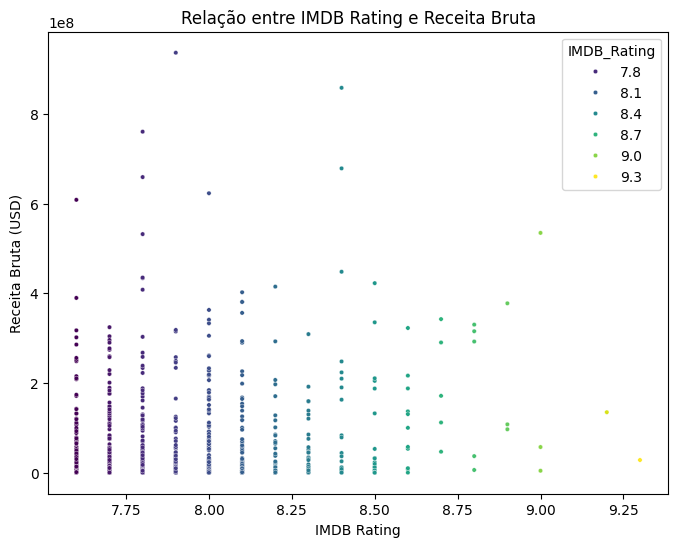

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))
seaborn.scatterplot(x=dataframe["IMDB_Rating"], y=dataframe["Gross"], hue = dataframe["IMDB_Rating"], palette="viridis", s=10, ax=ax)
ax.set_title("Relação entre IMDB Rating e Receita Bruta")
ax.set_xlabel("IMDB Rating")
ax.set_ylabel("Receita Bruta (USD)")

Uma primeira análise do Rating IMDB e a Receita Bruta dá a visualização de que os top filmes estão situados numa receita média de 4 milhões, e que estão bem distribuídos nesse alcance.

# Gráfico: Relação entre IMDB Rating e Duração dos Filmes

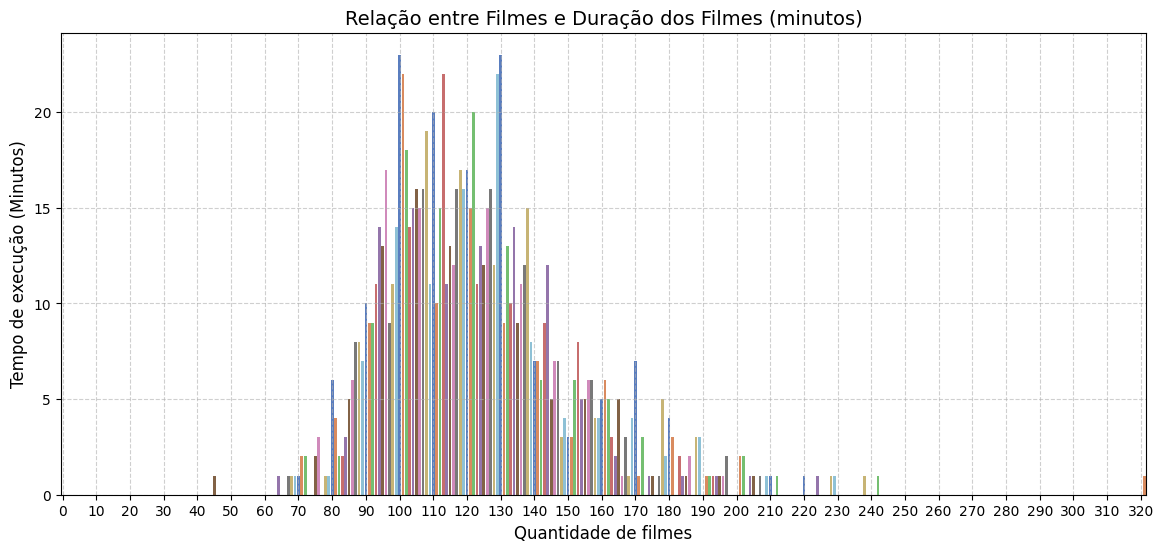

In [31]:
dataframe['Runtime'] = dataframe['Runtime'].astype(str)

# Remover "min" e converter para float
dataframe["Runtime"] = (
    dataframe["Runtime"]
    .str.replace(" min", "", regex=False)  # Remove " min"
    .str.strip()                           # Remove extra spaces
    .replace("", float("nan"))             # Handle empty strings explicitly
    .astype(float)                         # Convert to float
    .fillna(0)                             # Replace NaN with 0 (or use dropna())
    .astype(int)    
)  

#colocar todas as minutagens possíveis mesmo que não tenha filme correspondente
runtime_counts = dataframe["Runtime"].value_counts().reset_index()
runtime_counts.columns = ["Runtime", "Film Count"]
all_runtimes = pd.DataFrame({"Runtime": range(0, runtime_counts["Runtime"].max() + 1)})
full_data = pd.merge(all_runtimes, runtime_counts, on="Runtime", how="left").fillna(0)

# Criar o gráfico relacionando quantidade de filmes e minutos dos filmes
fig3, ax3 = plt.subplots(figsize=(14, 6))
seaborn.barplot(x="Runtime", y="Film Count", hue='Runtime', data=full_data, palette="muted", legend=False)
plt.title('Relação entre Filmes e Duração dos Filmes (minutos)', fontsize=14)

tick_interval = 10
xticks = numpy.arange(0, full_data["Runtime"].max() + 1, tick_interval)

plt.xticks(xticks)
plt.xlabel("Quantidade de filmes", fontsize=12)
plt.ylabel("Tempo de execução (Minutos)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

Analisando a quantidade de filmes com um tempo de execução específico, observa-se uma distribuição "quase normal", e o tempo de 110 minutos seria o seu pico. Há duas causalidades, em primeira análise:  
1. Há mais filmes nesse tempo pois a distribuição de todos os filmes analisados também tem um formato parecido.  
2. Há mais filmes nesse tempo pois é uma métrica fundamental na avaliação dos filmes   

Provavelmente, essa distribuição se dá por cada parte das causalidades, e elas se afetam. Por exemplo, se em outra análise verifica-se que as pessoas preferem filmes de drama, então faz sentido a tendência do cinema ser de filmes de drama.

# **Gráfico**: **Média de Votos por Ano**

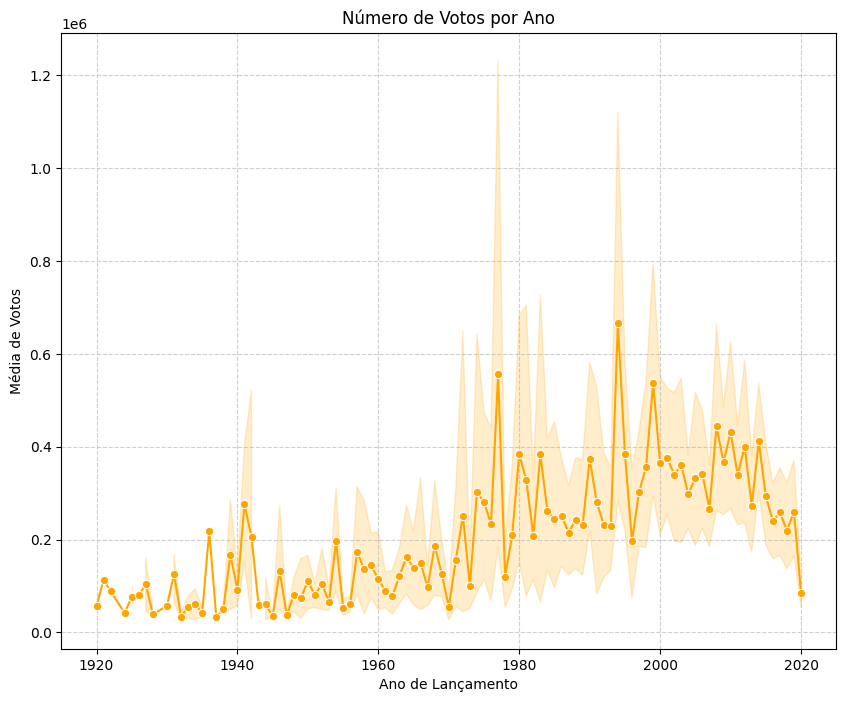

In [15]:
fig4, ax4 = plt.subplots(figsize=(10, 8))
seaborn.lineplot(x="Released_Year", y="No_of_Votes", data=dataframe, marker="o", color="orange", ax=ax4)
ax4.set_title("Número de Votos por Ano")
ax4.set_xlabel("Ano de Lançamento")
ax4.set_ylabel("Média de Votos")
plt.grid(True, linestyle='--', alpha=0.6)

É possível observar uma distribuição de votos que aumenta até 2010 e começa a decrescer depois disso. Há várias fenomenologias que podem explicar essa distribuição, como:  
1. A ascensão da indústria do cinema nos anos iniciais de sucesso  
2. Como se os anos com mais média de votos fossem "anos de ouro" para a indústria do cinema.
3. O desinteresse pode ter começado a tomar forma nesses últimos anos pois os filmes podem ter começado a se tornar "maçantes"


# Gráfico: Gênero x Quantidade de Filmes

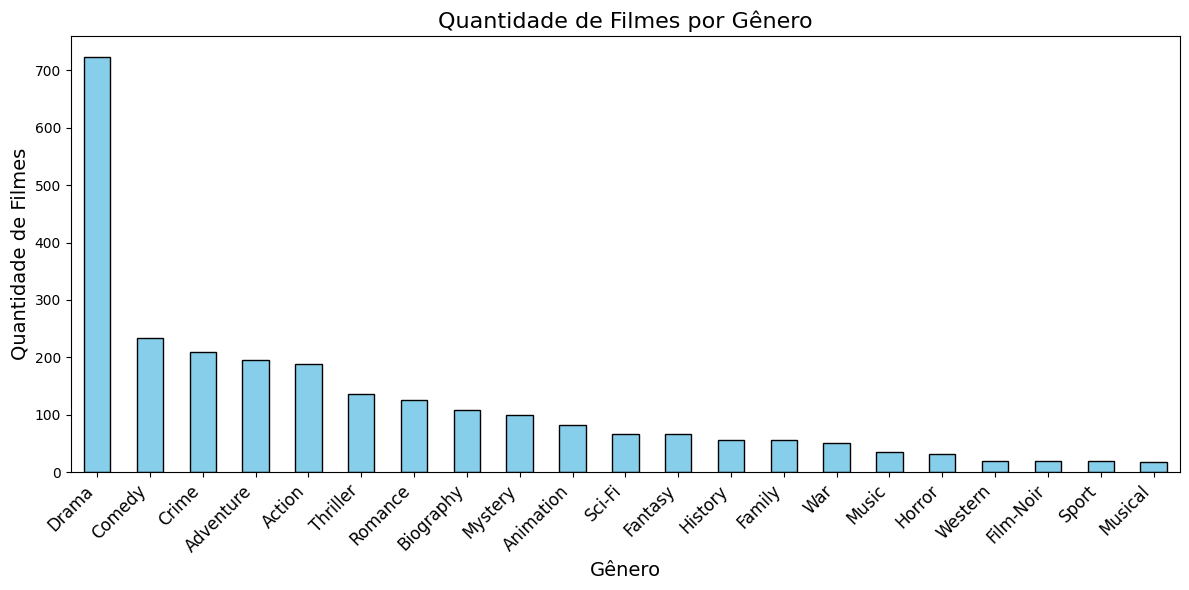

In [16]:
# Processar os gêneros
genre_counts = dataframe['Genre'].str.split(', ').explode().value_counts()

# Plotar o gráfico
fig5, ax5 = plt.subplots(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Quantidade de Filmes por Gênero', fontsize=16)
plt.xlabel('Gênero', fontsize=14)
plt.ylabel('Quantidade de Filmes', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()

Observa-se uma clara tendência de filmes da categoria de drama estarem presentes (mais de 70% dos filmes são de drama).  
Como no 2° gráfico, é possível implicar duas causalidades:  
1. Há mais filmes de drama pois há mais filmes de drama numa analise geral
2. Há mais filmes de drama pois é mais palatável ao público e, assim, sendo outra métrica na questão de avaliação do filme.

Numa análise final, para fazer um filme de sucesso, você deveria fazer um filme entre 2000-2010, de drama, com 120 minutos de execução.